In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy
from astropy.convolution import convolve, Box1DKernel

In [2]:
lc = fits.open(r'C:\Users\aswin\OneDrive\Desktop\ch2_xsm_20211111_v1_level2.lc')
pha = fits.open(r'C:\Users\aswin\OneDrive\Desktop\ch2_xsm_20211111_v1_level2.pha')

In [3]:
lc.info()

Filename: C:\Users\aswin\OneDrive\Desktop\ch2_xsm_20211111_v1_level2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     64   14096R x 4C   [D, E, E, E]   


In [4]:
lc[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsmgenlc '          / Creator of file                                
FILENAME= 'ch2_xsm_20211111_v1_level2.lc' / Name of file                        
CONTENT = 'Light curve'     

In [5]:
lc[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   20 / width of table in bytes                        
NAXIS2  =                14096 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'TIME    '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'RATE    '           / label for field   2                            
TFORM2  = 'E       '           / data format of field: 4-byte REAL              
TTYPE3  = 'ERROR   '        

In [6]:
pha.info()

Filename: C:\Users\aswin\OneDrive\Desktop\ch2_xsm_20211111_v1_level2.pha
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  SPECTRUM      1 BinTableHDU     89   248R x 9C   [1J, 512J, 512E, 512E, 512E, 1D, 1D, 1D, 1B]   


In [7]:
pha[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
MISSION = 'CHANDRAYAAN-2'      / Name of mission/satellite                      
TELESCOP= 'CH-2_ORBITER'       / Name of mission/satellite                      
INSTRUME= 'CH2_XSM '           / Name of Instrument/detector                    
ORIGIN  = 'PRLPOC  '           / Source of FITS file                            
CREATOR = 'xsmgenspec '        / Creator of file                                
FILENAME= 'ch2_xsm_20211111_v1_level2.pha' / Name of file                       
CONTENT = 'Type II PHA file'

In [8]:
pha[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                 8221 / width of table in bytes                        
NAXIS2  =                  248 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    9 / number of fields in each row                   
TTYPE1  = 'SPEC_NUM'           / PI Channel                                     
TFORM1  = '1J      '           / format of field: int                           
TTYPE2  = 'CHANNEL '           / Vector of spectral bin numbers.                
TFORM2  = '512J    '           / format of field                                
TTYPE3  = 'COUNTS  '        

In [9]:
count_rate = lc['Rate'].data['Rate']
time = lc['Rate'].data['Time']
count_rate, time = np.array(count_rate), np.array(time)
count_rate, time

(array([393.2046 , 387.1895 , 319.76932, ..., 350.23395, 398.74332,
        359.05457], dtype=float32),
 array([1.53360961e+08, 1.53360962e+08, 1.53360963e+08, ...,
        1.53397004e+08, 1.53397005e+08, 1.53397006e+08]))

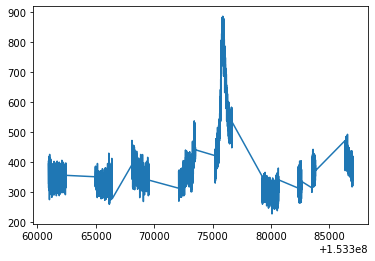

In [10]:
plt.plot(time[0:10000], count_rate[0:10000])#-1.53360961e+08

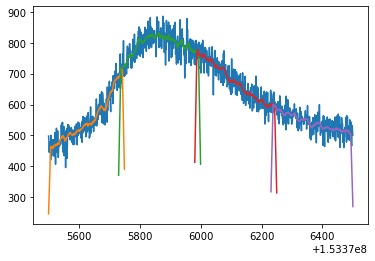

In [11]:
burst = np.intersect1d(np.where(time>1.533e8+75500), np.where(time<1.533e8+76500))
burst1 = burst[:250]
burst2 = burst[230:500]
burst3 = burst[480:750]
burst4 = burst[730:1000]
plt.plot(time[burst], count_rate[burst], alpha = 1)
smoothed_burst1 = convolve(count_rate[burst1], Box1DKernel(15))
smoothed_burst2 = convolve(count_rate[burst2], Box1DKernel(15))
smoothed_burst3 = convolve(count_rate[burst3], Box1DKernel(15))
smoothed_burst4 = convolve(count_rate[burst4], Box1DKernel(15))
plt.plot(time[burst1], smoothed_burst1, alpha = 1)
plt.plot(time[burst2], smoothed_burst2, alpha = 1)
plt.plot(time[burst3], smoothed_burst3, alpha = 1)
plt.plot(time[burst4], smoothed_burst4, alpha = 1)

In [11]:
tbegin = np.amin(time)
tend = np.amax(time)
bins = np.arange(tbegin, tend, 70)
bins

array([1.53360961e+08, 1.53361031e+08, 1.53361101e+08, 1.53361171e+08,
       1.53361241e+08, 1.53361311e+08, 1.53361381e+08, 1.53361451e+08,
       1.53361521e+08, 1.53361591e+08, 1.53361661e+08, 1.53361731e+08,
       1.53361801e+08, 1.53361871e+08, 1.53361941e+08, 1.53362011e+08,
       1.53362081e+08, 1.53362151e+08, 1.53362221e+08, 1.53362291e+08,
       1.53362361e+08, 1.53362431e+08, 1.53362501e+08, 1.53362571e+08,
       1.53362641e+08, 1.53362711e+08, 1.53362781e+08, 1.53362851e+08,
       1.53362921e+08, 1.53362991e+08, 1.53363061e+08, 1.53363131e+08,
       1.53363201e+08, 1.53363271e+08, 1.53363341e+08, 1.53363411e+08,
       1.53363481e+08, 1.53363551e+08, 1.53363621e+08, 1.53363691e+08,
       1.53363761e+08, 1.53363831e+08, 1.53363901e+08, 1.53363971e+08,
       1.53364041e+08, 1.53364111e+08, 1.53364181e+08, 1.53364251e+08,
       1.53364321e+08, 1.53364391e+08, 1.53364461e+08, 1.53364531e+08,
       1.53364601e+08, 1.53364671e+08, 1.53364741e+08, 1.53364811e+08,
      

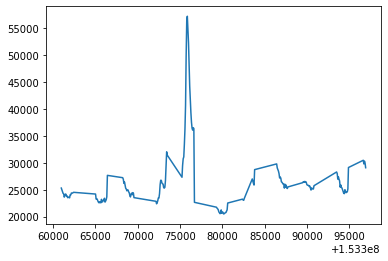

In [83]:
binned_time, binned_count = [], []
smooth= convolve(count_rate, Box1DKernel(11))
b = 70
for i in range(len(time)//b):
    binned_time.append(time[b*i])
    binned_count.append(np.sum(count_rate[b*i:b*(i+1)]))
#plt.plot(binned_time[100:200], binned_count[100:200])
plt.plot(binned_time, binned_count)

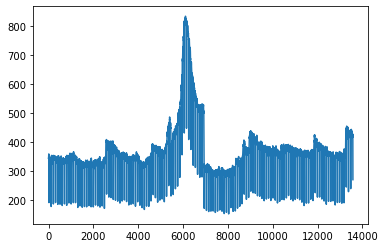

In [32]:
binned = np.array([])
bin_size = 100
for i in range(len(time)//bin_size):
    smooth = convolve(count_rate[bin_size*i:bin_size*(i+1)], Box1DKernel(11))
    sm_count = np.concatenate((sm_count, smooth))[2:-1]
plt.plot(sm_count)

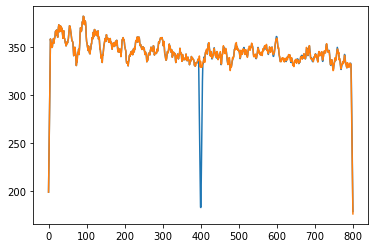

In [69]:
a=count_rate[0:100]
b=count_rate[100:200]
bxa1 = convolve(count_rate[0:400], Box1DKernel(11))
bxa2 = convolve(count_rate[400:800], Box1DKernel(10))
c = convolve(count_rate[0:800], Box1DKernel(11))
bxa3 = np.concatenate((bxa1, bxa2))
plt.plot(bxa3)
plt.plot(c)

In [56]:
combined = np.column_stack((count_rate,time))
combined

array([[3.93204590e+02, 1.53360961e+08],
       [3.87189514e+02, 1.53360962e+08],
       [3.19769318e+02, 1.53360963e+08],
       ...,
       [3.50233948e+02, 1.53397004e+08],
       [3.98743317e+02, 1.53397005e+08],
       [3.59054565e+02, 1.53397006e+08]])

In [31]:
print(np.average(count_rate[100:200]))
print(np.average(convolve(count_rate[100:200], Box1DKernel(11))))

354.3848
344.4242


In [86]:
x = convolve(count_rate[0:70], Box1DKernel(11))
x

array([198.62883, 231.68878, 264.46436, 298.51544, 327.01102, 358.88303,
       355.5616 , 350.033  , 353.57892, 349.9435 , 350.5187 , 354.8498 ,
       355.77216, 359.26437, 354.42072, 357.89868, 359.89664, 361.5317 ,
       366.6219 , 366.9473 , 364.02554, 368.25305, 363.00748, 363.38113,
       360.55954, 367.06335, 371.01703, 373.6473 , 368.3999 , 366.37006,
       371.45984, 372.5533 , 366.8001 , 371.87857, 369.51953, 370.08154,
       366.8182 , 363.6145 , 359.46542, 366.69913, 367.4631 , 359.648  ,
       359.53107, 357.5094 , 354.50854, 354.77   , 351.60278, 352.72867,
       353.66254, 356.00128, 354.74298, 357.4065 , 358.90942, 363.62668,
       369.35538, 372.64297, 372.16956, 370.3968 , 367.57144, 364.72595,
       360.83414, 358.0028 , 356.6254 , 356.29477, 354.83633, 320.8233 ,
       285.73956, 253.95453, 224.8863 , 194.13788], dtype=float32)

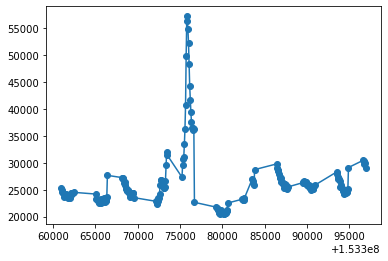

In [84]:
plt.plot(binned_time, binned_count, marker = 'o')

In [95]:
binned_count
mask = np.array(np.ediff1d(binned_count).clip(min = 0), dtype = bool)
mask

array([False, False, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False, False, False,  True, False,
       False, False,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False,

In [157]:
dr = binned_count[:-4]
nr = binned_count[4:]
where = np.where(np.divide(nr, dr)>1)
where[0][0]

0

85
91
104


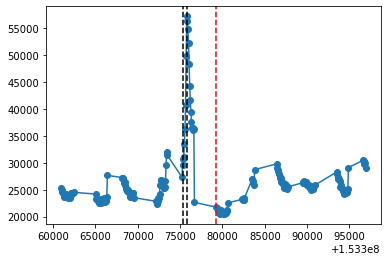

In [82]:
#Start of burst
st_cutoff = 1.3
st_nr = binned_count[4:]
st_dr = binned_count[:-4]
st_flags = np.where(np.divide(st_nr, st_dr)>st_cutoff)
print(st_flags[0][0])

#Peak of burst
peak = binned_count[st_flags[0][0]:]
pk_nr = peak[4:]
pk_dr = peak[:-4]
peak_flags = st_flags[0][0]+np.where(np.divide(pk_nr, pk_dr)<1)
print(peak_flags[0][0])

#End of burst
zero_crossings = peak_flags[0][0]+np.where(np.where(np.diff(np.sign(np.divide(pk_nr, pk_dr)-1)))[0]>peak_flags[0][0])
print(zero_crossings[0][0])

plt.plot(binned_time, binned_count,marker = 'o')
plt.axvline(binned_time[st_flags[0][0]], color = 'black', ls='--')
plt.axvline(binned_time[peak_flags[0][0]], color = 'black', ls='--')
plt.axvline(binned_time[zero_crossings[0][1]], color = 'red', ls='--')

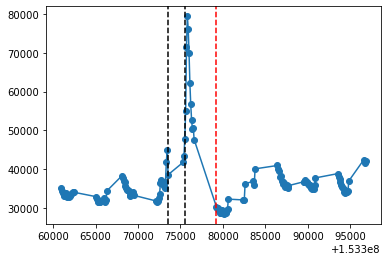

In [207]:
dr = binned_count[:-4]
nr = binned_count[4:]
where = np.where(np.divide(nr, dr)>1.3)
where[0][0]
further_counts = binned_count[where[0][0]:]
drdec = further_counts[:-4]
nrdec = further_counts[4:]
dec_where = where[0][0]+np.where(np.divide(nrdec, drdec)<1)
dec_where
plt.plot(binned_time, binned_count,marker = 'o')
plt.axvline(binned_time[where[0][0]], color = 'black', ls='--')
plt.axvline(binned_time[where[0][-1]], color = 'black', ls='--')
plt.axvline(binned_time[zero_crossings[0][1]], color = 'red', ls='--')

In [206]:
further_counts = binned_count[where[0][0]:]
drdec = further_counts[:-4]
nrdec = further_counts[4:]
dec_where = where[0][0]+np.where(np.divide(nrdec, drdec)<1)
np.divide(nrdec, drdec) -1 #dec_where
zero_crossings = where[0][0]+np.where(np.where(np.diff(np.sign(np.divide(nrdec, drdec) -1)))[0]>where[0][0])+6
zero_crossings

array([[72, 73]], dtype=int64)

In [210]:
np.where(np.sign(np.divide(nrdec, drdec)-1))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77], dtype=int64),)

In [17]:
gti = fits.open(r'C:\Users\aswin\OneDrive\Desktop\ch2_xsm_20211111_v1_level2.gti')

In [18]:
gti.info()

Filename: C:\Users\aswin\OneDrive\Desktop\ch2_xsm_20211111_v1_level2.gti
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  GTI           1 BinTableHDU     53   13R x 2C   [D, D]   


In [19]:
gtis = np.array(gti[1].data)

In [85]:
gti_arr = []
for i in range(len(gtis)):
    gti_arr.append(gtis[i][0])
    gti_arr.append(gtis[i][1])
gtis[0][0]-1.53360961e+08, gtis[0][1]-1.53360961e+08

(-0.09974002838134766, 1486.8991989791393)

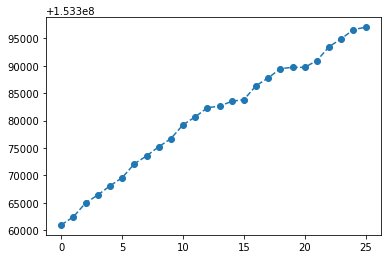

In [21]:
plt.plot(gti_arr, linestyle = '--', marker = 'o')

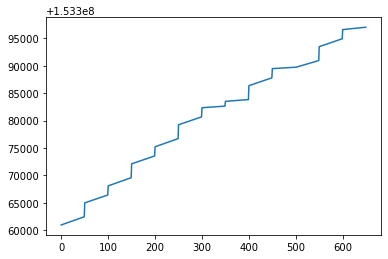

In [22]:
comparison_times = np.array([])
for i in range(0, 26, 2):
    comparison_times = np.append(comparison_times, np.linspace(gti_arr[i], gti_arr[i+1]))
plt.plot(comparison_times)

In [23]:
comparison_times

array([1.53360961e+08, 1.53360991e+08, 1.53361022e+08, 1.53361052e+08,
       1.53361082e+08, 1.53361113e+08, 1.53361143e+08, 1.53361173e+08,
       1.53361204e+08, 1.53361234e+08, 1.53361264e+08, 1.53361295e+08,
       1.53361325e+08, 1.53361355e+08, 1.53361386e+08, 1.53361416e+08,
       1.53361446e+08, 1.53361477e+08, 1.53361507e+08, 1.53361537e+08,
       1.53361568e+08, 1.53361598e+08, 1.53361629e+08, 1.53361659e+08,
       1.53361689e+08, 1.53361720e+08, 1.53361750e+08, 1.53361780e+08,
       1.53361811e+08, 1.53361841e+08, 1.53361871e+08, 1.53361902e+08,
       1.53361932e+08, 1.53361962e+08, 1.53361993e+08, 1.53362023e+08,
       1.53362053e+08, 1.53362084e+08, 1.53362114e+08, 1.53362144e+08,
       1.53362175e+08, 1.53362205e+08, 1.53362235e+08, 1.53362266e+08,
       1.53362296e+08, 1.53362327e+08, 1.53362357e+08, 1.53362387e+08,
       1.53362418e+08, 1.53362448e+08, 1.53364976e+08, 1.53365005e+08,
       1.53365035e+08, 1.53365064e+08, 1.53365093e+08, 1.53365123e+08,
      

In [24]:
np.append(np.array([]),np.linspace(gti_arr[0], gti_arr[1]))

array([1.53360961e+08, 1.53360991e+08, 1.53361022e+08, 1.53361052e+08,
       1.53361082e+08, 1.53361113e+08, 1.53361143e+08, 1.53361173e+08,
       1.53361204e+08, 1.53361234e+08, 1.53361264e+08, 1.53361295e+08,
       1.53361325e+08, 1.53361355e+08, 1.53361386e+08, 1.53361416e+08,
       1.53361446e+08, 1.53361477e+08, 1.53361507e+08, 1.53361537e+08,
       1.53361568e+08, 1.53361598e+08, 1.53361629e+08, 1.53361659e+08,
       1.53361689e+08, 1.53361720e+08, 1.53361750e+08, 1.53361780e+08,
       1.53361811e+08, 1.53361841e+08, 1.53361871e+08, 1.53361902e+08,
       1.53361932e+08, 1.53361962e+08, 1.53361993e+08, 1.53362023e+08,
       1.53362053e+08, 1.53362084e+08, 1.53362114e+08, 1.53362144e+08,
       1.53362175e+08, 1.53362205e+08, 1.53362235e+08, 1.53362266e+08,
       1.53362296e+08, 1.53362327e+08, 1.53362357e+08, 1.53362387e+08,
       1.53362418e+08, 1.53362448e+08])